In [1]:
import pandas as pd
import jupyter as jp
import numpy as np
import matplotlib.pyplot as plt
import requests as req
import json
import os
from dotenv import load_dotenv

In [2]:
load_dotenv('auction.env')
access_token = os.getenv('access_token')
client_id = os.getenv('client_id')
secret = os.getenv('secret')

In [3]:
import requests
response = requests.post('https://oauth.battle.net/token', auth=(client_id, secret), data={'grant_type': 'client_credentials'})
if response.status_code == 200:
    access_token = response.json()['access_token']
    print('Access token:', access_token)
else:
    print('Failed to retrieve access token')
    print("status code:", response.status_code)
    print('Response:', response.text)


Access token: US5VUrj0XcvIIDkU8dlJXbukseOzc59M8C


In [5]:
import requests


api_url = "https://us.api.blizzard.com/data/wow/realm/index"
namespace = "dynamic-us"  # Adjust as necessary
locale = "en_US"  # Locale can be adjusted as needed

headers = {
    'Authorization': f'Bearer {access_token}',
    'Battlenet-Namespace': namespace,
    'locale': locale
}

response = requests.get(api_url, headers=headers)

if response.status_code == 200:
    realms_data = response.json()
    for realm in realms_data.get('realms', []):
        print(realm['id'], realm['name'])
else:
    print('Failed to retrieve realm data')
    print('Status Code:', response.status_code)
    print('Response:', response.text)

129 {'en_US': 'Gurubashi', 'es_MX': 'Gurubashi', 'pt_BR': 'Gurubashi', 'de_DE': 'Gurubashi', 'en_GB': 'Gurubashi', 'es_ES': 'Gurubashi', 'fr_FR': 'Gurubashi', 'it_IT': 'Gurubashi', 'ru_RU': 'Gurubashi', 'ko_KR': 'Gurubashi', 'zh_TW': '古拉巴什', 'zh_CN': '古拉巴什'}
131 {'en_US': 'Skywall', 'es_MX': 'Skywall', 'pt_BR': 'Skywall', 'de_DE': 'Skywall', 'en_GB': 'Skywall', 'es_ES': 'Skywall', 'fr_FR': 'Skywall', 'it_IT': 'Skywall', 'ru_RU': 'Skywall', 'ko_KR': 'Skywall', 'zh_TW': '天空之牆', 'zh_CN': '天空之墙'}
66 {'en_US': 'Dalaran', 'es_MX': 'Dalaran', 'pt_BR': 'Dalaran', 'de_DE': 'Dalaran', 'en_GB': 'Dalaran', 'es_ES': 'Dalaran', 'fr_FR': 'Dalaran', 'it_IT': 'Dalaran', 'ru_RU': 'Dalaran', 'ko_KR': 'Dalaran', 'zh_TW': '達拉然', 'zh_CN': '达拉然'}
51 {'en_US': 'Garona', 'es_MX': 'Garona', 'pt_BR': 'Garona', 'de_DE': 'Garona', 'en_GB': 'Garona', 'es_ES': 'Garona', 'fr_FR': 'Garona', 'it_IT': 'Garona', 'ru_RU': 'Garona', 'ko_KR': 'Garona', 'zh_TW': '迦羅娜', 'zh_CN': '迦罗娜'}
103 {'en_US': 'Thunderlord', 'es_MX': 'T

In [8]:

api_url = f'https://us.api.blizzard.com/data/wow/auctions/commodities'


# Making the GET request
response = requests.get(api_url, headers=headers, params={'namespace': namespace})

# Checking the response
if response.status_code == 200:
    data = response.json()
    df = pd.json_normalize(data, record_path=['auctions'])

    # Save DataFrame to CSV
    df.to_csv('./commodities_data_12-22-23.csv', index=False)
    print("Data saved to 'commodities_data_12-22-23.csv'")

else:
    print('Failed to retrieve auction data')
    print("Status Code:", response.status_code)
    print('Response:', response.text)

Data saved to 'commodities_data_12-22-23.csv'


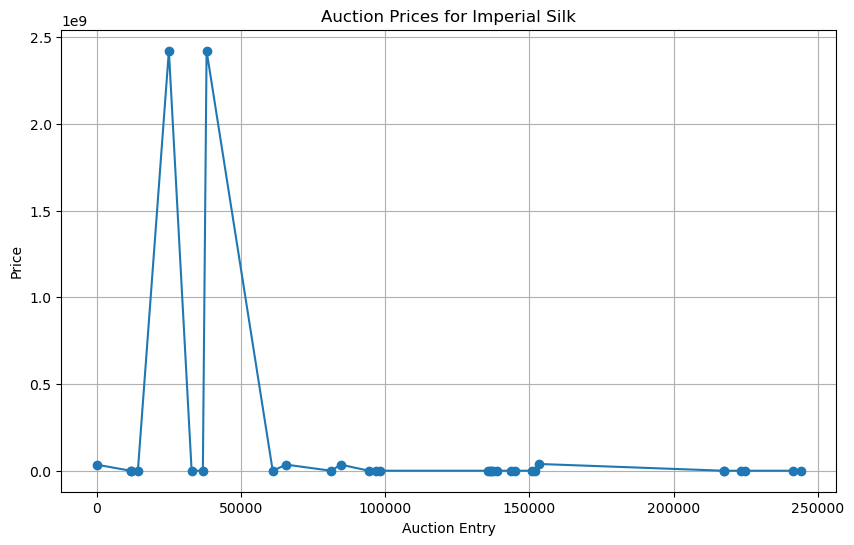

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('C:/Users/Robert/Desktop/Auction_House/commodities_data_12-22-23.csv')
#Disregard below reference to imperial silk item. It does not appear that the wowhead item numbers correlate to the commodities data item id.
# Filter for the item ID, ensure the correct column name and data type
imperial_silk_df = df[df['item.id'] == 191944]

# Check if the filtered DataFrame is not empty
if not imperial_silk_df.empty:
    # Extract the auction prices, ensure 'buyout' is the correct column name
    prices = imperial_silk_df['unit_price']  # This column should contain numeric values

    # Plotting the prices
    plt.figure(figsize=(10, 6))
    plt.plot(prices, marker='o')
    plt.title('Auction Prices for Imperial Silk')  # Update the title to match your item
    plt.xlabel('Auction Entry')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()
else:
    print("No data found for the specified item.")

In [50]:
df = pd.read_csv('C:/Users/Robert/Desktop/Auction_House/commodities_data_12-21-23.csv')
df.head(50)

,id,quantity,unit_price,time_left,item.id
0,1873891548,1,5000100,SHORT,204237
1,1873891691,3,2000,SHORT,68198
2,1873891946,18,979800,SHORT,13755
3,1873892023,10,14575100,SHORT,139338
4,1873892058,1,88000,SHORT,79101
5,1873892162,2,500600,SHORT,192852
6,1873892532,10,50000,SHORT,153661
7,1873892585,1,3000,SHORT,4558
8,1873892665,16,101500,SHORT,124118
9,1873892663,9,5900,SHORT,192636


In [66]:
# Blizzard Item API
# We should be able to use this api to get the item name and id for the item numbers in our commodities data.
import requests


api_url = f'https://us.api.blizzard.com/data/wow/item/{94288}'
namespace = "dynamic-us"  # Adjust as necessary
locale = "en_US"  # Locale can be adjusted as needed

headers = {
    'Authorization': f'Bearer {access_token}',
    'Battlenet-Namespace': namespace,
    'locale': locale
}

response = requests.get(api_url, headers=headers)

print(response.status_code)

404
